In [1]:
import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g
AAACCTGAGACAATAC.4-BC,0.367125,0.162271,0.000418,0.336490,0.550221,2.141099,0.422265
AAACCTGAGACTAGAT.4-BC,0.392578,0.166229,-0.088279,0.359661,0.604995,2.445398,0.467329
AAACCTGAGCGATATA.2-BC,0.323340,0.076525,-0.100572,0.265494,0.413902,2.380752,0.528861
AAACCTGCAATGGACG.3-BC,0.360891,0.048679,-0.087743,0.160985,0.358470,1.965099,0.209789
AAACCTGGTCGGCTCA.2-BC,0.464857,0.264444,0.099728,0.387629,0.707396,1.930922,0.254694
...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,0.365834,0.147752,-0.009562,0.185494,0.442087,2.190279,0.219281
TTTATGCGTGAGGCTA.32-FTC,0.310427,0.104303,-0.063728,0.272077,0.640348,2.141653,0.259097
TTTCCTCTCCATGCTC.32-FTC,0.479679,0.275353,0.103058,0.344905,0.861424,1.565744,0.234984
TTTGGTTGTCTCAACA.32-FTC,0.629869,0.466696,0.330235,0.513946,0.718995,2.058280,0.256269


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8Lowery_pos_243g", 
    "CD8Oliveira_TTE_100g", 
    "CD8Oliveira_pos_74g", 
    "CD8Yost_CD8_Exh_100g", 
    "ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    #"CD8Lowery_neg_99g",
    "ave_Hanada_neg_5g", 
    "ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "Hanada_pos_9g", 
    "CD4Caushi_Tfh2_66g", 
    #"CD4Jansen_TermDiff_73g", 
    "CD4Lowery_pos_40g", 
    "CD4Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4Lowery_neg_37g", 
    "Hanada_neg_4g"
]

def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df.copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    sub[cols] = sub[cols].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = sub[pos_sigs].mean(axis=1)
    sub[f"neg_score_{cell_type}"] = sub[neg_sigs].mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGACAATAC.4-BC,-0.018724,-0.245232,-0.423294,0.441318,-0.263167,0.046355,1.092494,-0.101820,0.569424,False
AAACCTGAGACTAGAT.4-BC,0.243790,-0.207186,-1.120215,0.626719,-0.038363,0.774608,1.422303,-0.099051,1.098455,False
AAACCTGAGCGATATA.2-BC,-0.470300,-1.069476,-1.216807,-0.126767,-0.822654,0.619896,1.872631,-0.741201,1.246263,False
AAACCTGCAATGGACG.3-BC,-0.083018,-1.337148,-1.116006,-0.963002,-1.050161,-0.374851,-0.462546,-0.909867,-0.418699,False
AAACCTGGTCGGCTCA.2-BC,0.989239,0.736908,0.357018,0.850513,0.381916,-0.456644,-0.133903,0.663119,-0.295273,True
...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,-0.032041,-0.384796,-0.501712,-0.766891,-0.706976,0.164054,-0.393079,-0.478483,-0.114512,False
TTTATGCGTGAGGCTA.32-FTC,-0.603470,-0.802453,-0.927309,-0.074086,0.106735,0.047682,-0.101683,-0.460117,-0.027001,False
TTTCCTCTCCATGCTC.32-FTC,1.142104,0.841770,0.383187,0.508653,1.014082,-1.330594,-0.278155,0.777959,-0.804374,True
TTTGGTTGTCTCAACA.32-FTC,2.691079,2.681073,2.168192,1.861250,0.429520,-0.151848,-0.122377,1.966223,-0.137112,True


In [3]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Hanada_neg_4g,CD4Hanada_pos_9g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,...,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAACTGTA.2-BC,0.228847,0.789747,0.446966,1.364860,0.003419,-0.660240,0.206699,0.306539,-0.055319,0.835700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGTATCGAA.2-BC,0.672020,0.796366,0.446842,1.101473,-0.942740,-0.483019,0.458199,2.052107,-0.073885,1.576790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCACAACTGT.3-BC,-1.042287,0.789666,0.390179,0.435202,-1.553097,-0.462399,-0.468550,1.027526,-0.881583,0.731364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCATTTGCCC.4-BC,1.039152,0.796847,0.495266,0.830806,1.982021,-0.263161,0.146293,2.039841,0.726076,1.435323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGGTGATGCCC.2-BC,-1.030408,0.794684,0.391830,0.822749,-0.605969,-0.926655,-0.165418,2.092327,-0.682112,1.457538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.032041,-0.384796,-0.501712,-0.766891,-0.706976,0.164054,-0.393079,-0.478483,-0.114512,False
TTTATGCGTGAGGCTA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.603470,-0.802453,-0.927309,-0.074086,0.106735,0.047682,-0.101683,-0.460117,-0.027001,False
TTTCCTCTCCATGCTC.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.142104,0.841770,0.383187,0.508653,1.014082,-1.330594,-0.278155,0.777959,-0.804374,True
TTTGGTTGTCTCAACA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691079,2.681073,2.168192,1.861250,0.429520,-0.151848,-0.122377,1.966223,-0.137112,True


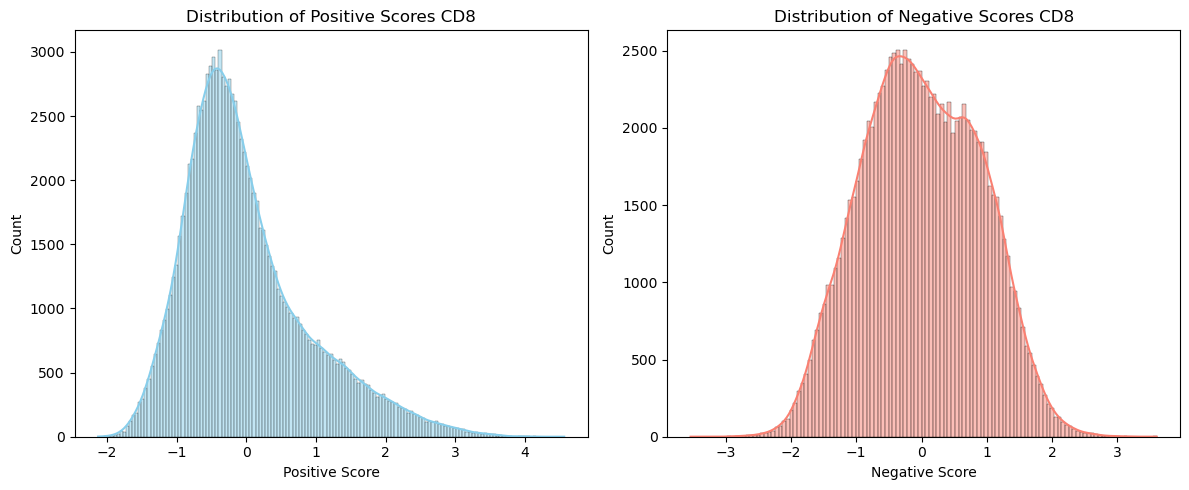

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

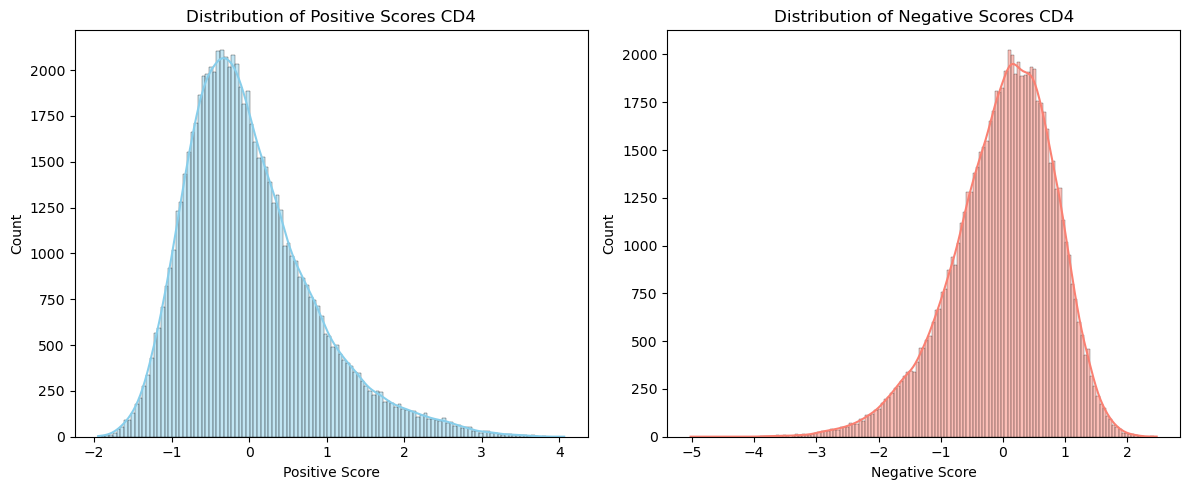

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

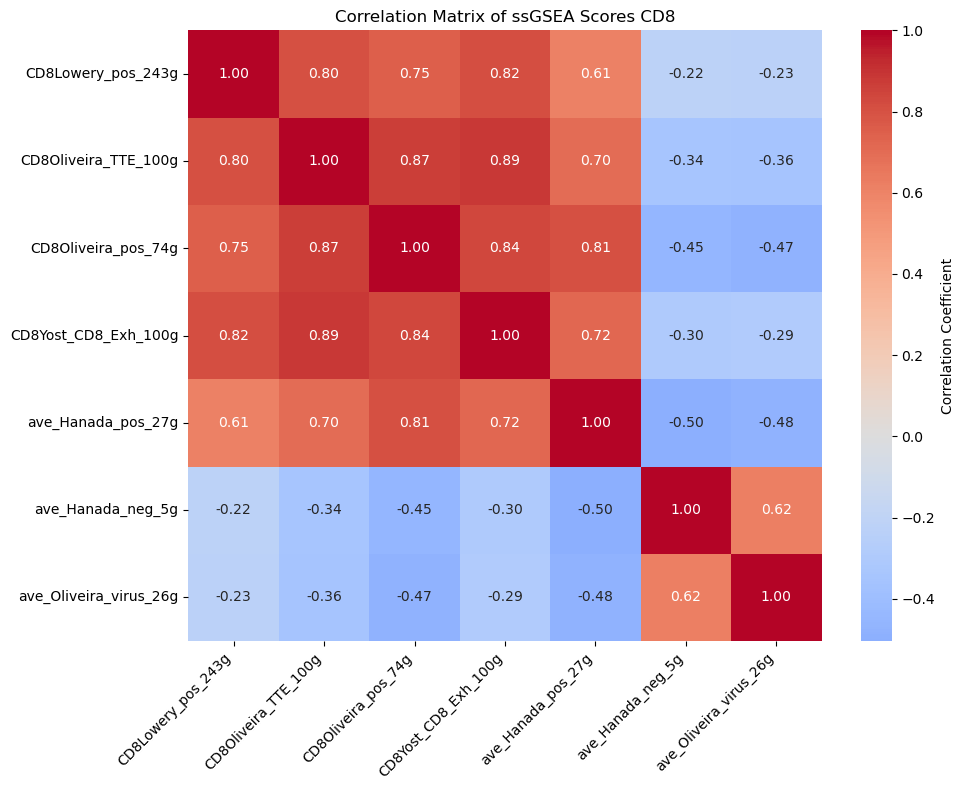

In [6]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

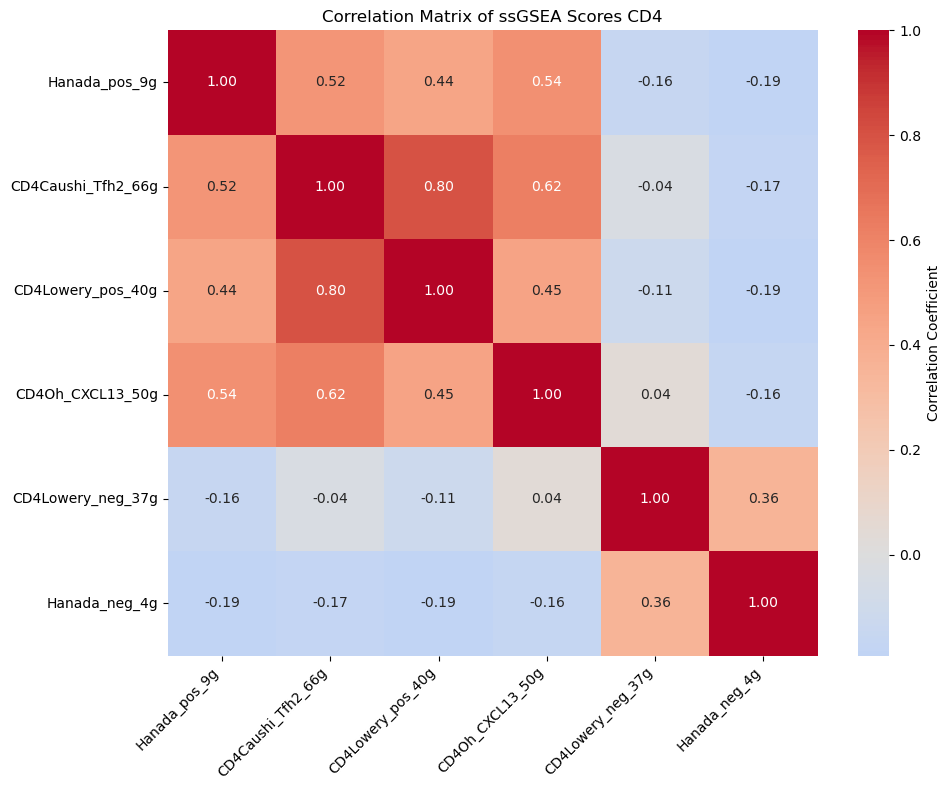

In [7]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [8]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [14]:
import scanpy as sc
import glob
import os

def read_table(path, **kwargs):
    """Convenience for gzipped TSV with rownames in col 0."""
    return pd.read_csv(path, sep="\t", index_col=0, compression="gzip", **kwargs)

DATA_DIR = ""

meta_fp = os.path.join(DATA_DIR, "GSE156728_metadata.txt.gz")
meta = read_table(meta_fp)

l = ['BC','BCL','ESCA','MM','PACA','RC','THCA','UCEC','OV','FTC']

# List to store the processed AnnData objects
adatas = []

for i in l:
    df_path = glob.glob(os.path.join(DATA_DIR, f"*{i}_10X.CD8.counts.txt.gz"))[0]
    df = read_table(df_path)
    
    adata = sc.AnnData(df.T)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.obs = adata.obs.join(meta)
    print(adata)

    new_index = [bc + f"-{i}" for bc in adata.obs.index]
    adata.obs.index = new_index

    median_depth = np.median(adata.obs['total_counts'].values)
    sc.pp.normalize_total(adata, target_sum=median_depth)
    sc.pp.log1p(adata)  # log transform

    # Append the AnnData object to the list
    adatas.append(adata)

# Concatenate all adatas into one single AnnData object
adata_concat = sc.concat(adatas, label='batch', keys=l, join='inner')

AnnData object with n_obs × n_vars = 4291 × 24148
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 3482 × 28855
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 12526 × 24148
    obs: 'n_g

In [19]:
adatas = []

for i in l:
    df_path = glob.glob(os.path.join(DATA_DIR, f"*{i}_10X.CD4.counts.txt.gz"))[0]
    df = read_table(df_path)
    
    adata = sc.AnnData(df.T)
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    adata.obs = adata.obs.join(meta)
    print(adata)

    new_index = [bc + f"-{i}" for bc in adata.obs.index]
    adata.obs.index = new_index

    median_depth = np.median(adata.obs['total_counts'].values)
    sc.pp.normalize_total(adata, target_sum=median_depth)
    sc.pp.log1p(adata)  # log transform

    # Append the AnnData object to the list
    adatas.append(adata)

# Concatenate all adatas into one single AnnData object
adata_concat_CD4 = sc.concat(adatas, label='batch', keys=l, join='inner')

AnnData object with n_obs × n_vars = 3063 × 24148
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 4237 × 28855
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cancerType', 'patient', 'libraryID', 'loc', 'meta.cluster', 'platform'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
AnnData object with n_obs × n_vars = 12358 × 24148
    obs: 'n_g

In [15]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [20]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_concat.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_concat_CD4.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 159/164 CD4 genes are found.
 391/396 CD8 genes are found.


/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10

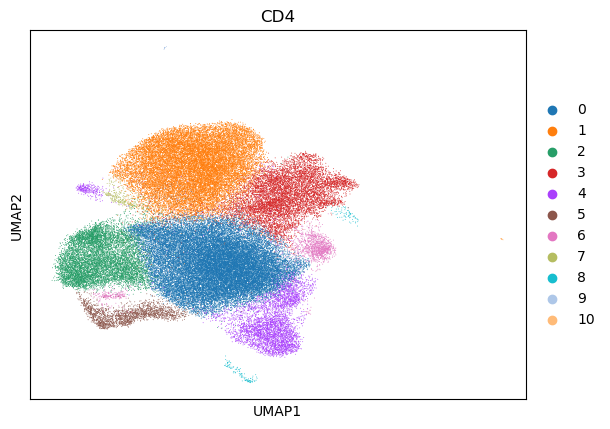

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


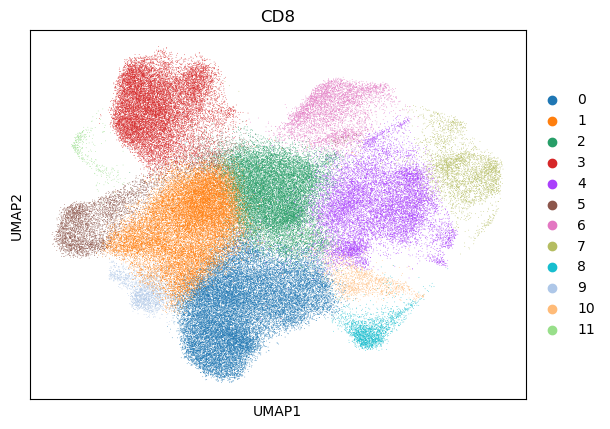

In [21]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd4 = run_cluster(adata_concat_CD4[:, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata_concat[:, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [42]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

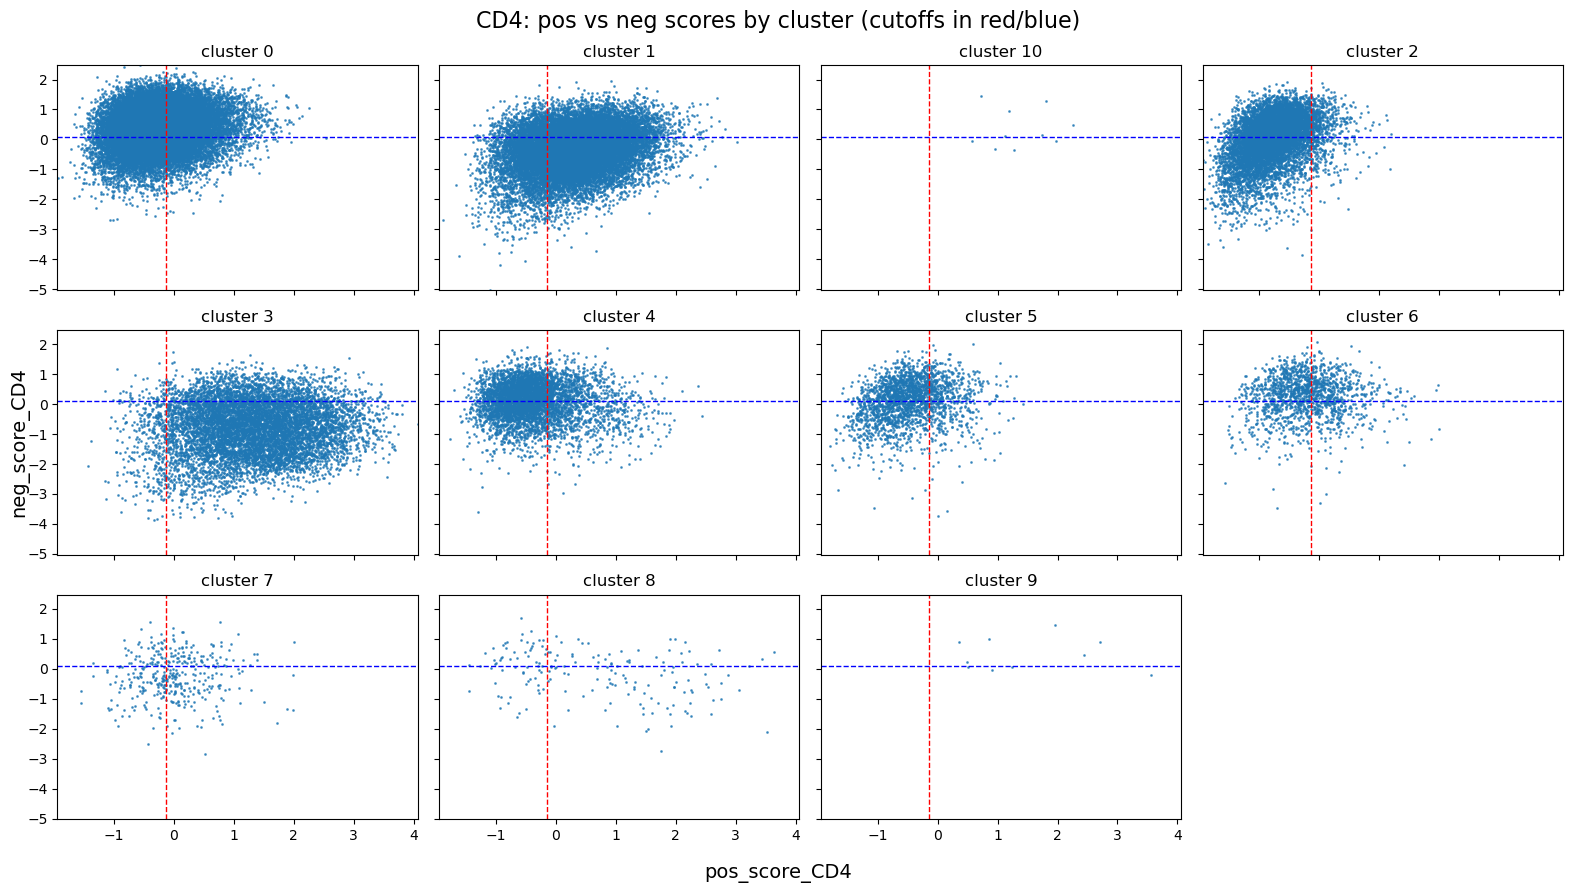

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    # means
    # mean_x = sub['pos_score_CD4'].mean()
    # mean_y = sub['neg_score_CD4'].mean()
    
    # # vertical & horizontal lines
    # ax.axvline(mean_x, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y, color='blue', linestyle='--', linewidth=1)

    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

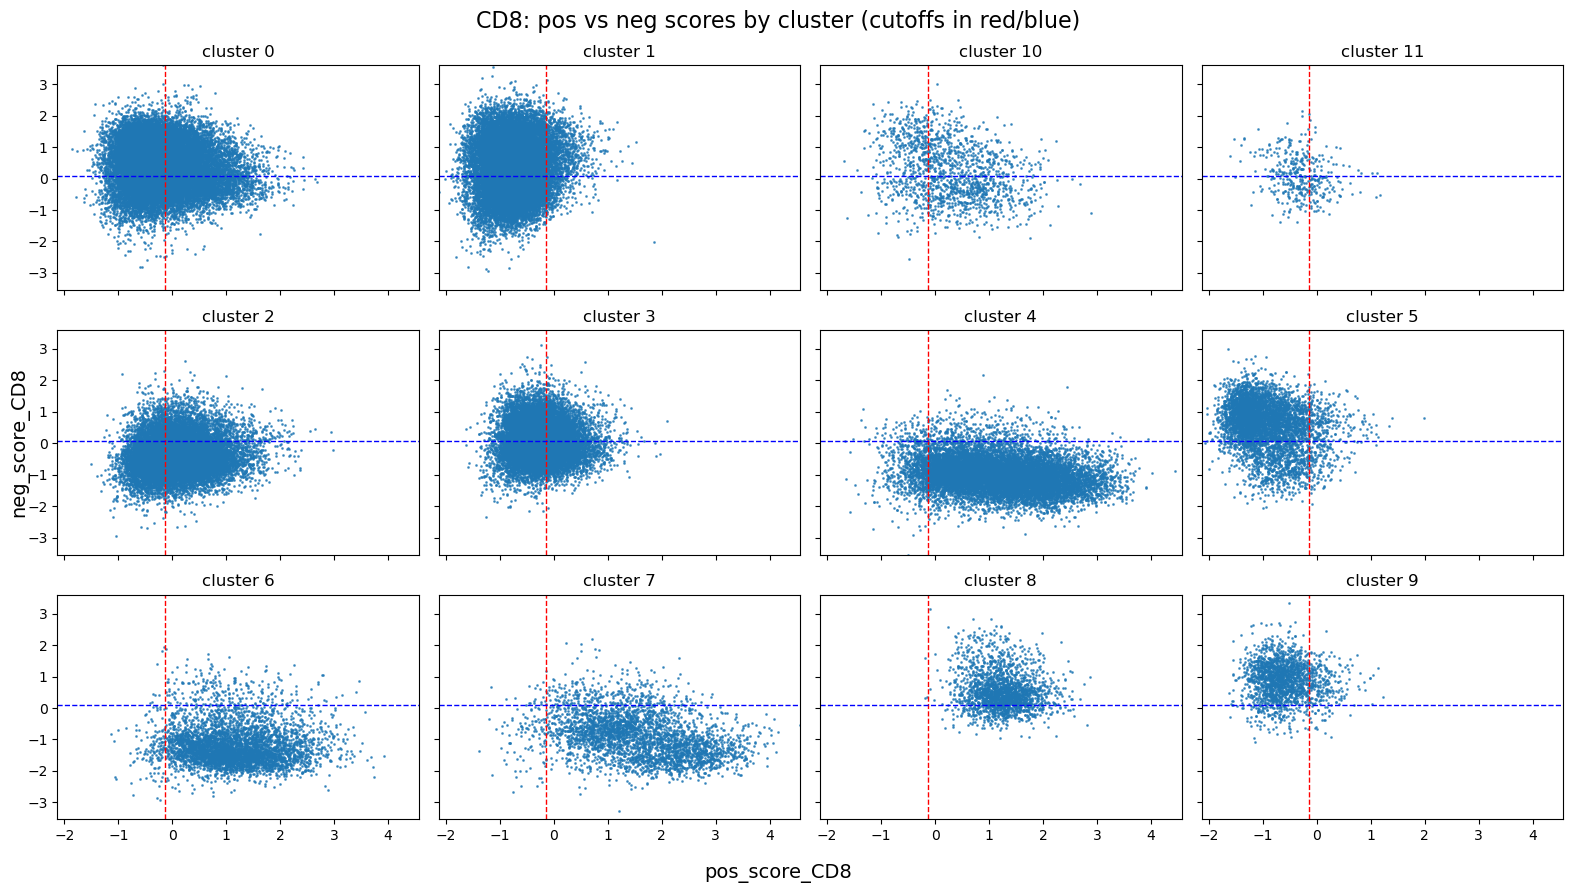

In [44]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    # cluster means
    # mean_x8 = sub8['pos_score_CD8'].mean()
    # mean_y8 = sub8['neg_score_CD8'].mean()
    
    # # draw mean lines
    # ax.axvline(mean_x8, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y8, color='blue', linestyle='--', linewidth=1)
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [45]:
merged_df["CD_type_by_cluster"] = merged_df["cluster_CD4"].notna().map({True: "CD4", False: "CD8"})

In [46]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["CD_type_by_cluster"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["CD_type_by_cluster"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["CD_type_by_cluster", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,CD_type_by_cluster,cluster,reactive_fraction
0,CD4,0,0.093813
1,CD4,1,0.522797
2,CD4,10,0.400000
3,CD4,2,0.021201
4,CD4,3,0.790981
5,CD4,4,0.143587
6,CD4,5,0.094576
7,CD4,6,0.154515
8,CD4,7,0.360313
9,CD4,8,0.418994


In [47]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD4', '1'),
 ('CD4', '3'),
 ('CD4', '8'),
 ('CD8', '2'),
 ('CD8', '4'),
 ('CD8', '6'),
 ('CD8', '7')}

In [48]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["CD_type_by_cluster"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

,CD4Caushi_Tfh2_66g,CD4Hanada_neg_4g,CD4Hanada_pos_9g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
AAACCTGAGAACTGTA.2-BC,0.228847,0.789747,0.446966,1.364860,0.003419,-0.660240,0.206699,0.306539,-0.055319,0.835700,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGAGTATCGAA.2-BC,0.672020,0.796366,0.446842,1.101473,-0.942740,-0.483019,0.458199,2.052107,-0.073885,1.576790,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGCACAACTGT.3-BC,-1.042287,0.789666,0.390179,0.435202,-1.553097,-0.462399,-0.468550,1.027526,-0.881583,0.731364,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGCATTTGCCC.4-BC,1.039152,0.796847,0.495266,0.830806,1.982021,-0.263161,0.146293,2.039841,0.726076,1.435323,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,CD4,10,False,False
AAACCTGGTGATGCCC.2-BC,-1.030408,0.794684,0.391830,0.822749,-0.605969,-0.926655,-0.165418,2.092327,-0.682112,1.457538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,CD4,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACTGAGATAGGAG.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.032041,-0.384796,-0.501712,-0.766891,-0.706976,0.164054,-0.393079,-0.478483,-0.114512,False,NaN,1,CD8,1,False,False
TTTATGCGTGAGGCTA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.603470,-0.802453,-0.927309,-0.074086,0.106735,0.047682,-0.101683,-0.460117,-0.027001,False,NaN,1,CD8,1,False,False
TTTCCTCTCCATGCTC.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.142104,0.841770,0.383187,0.508653,1.014082,-1.330594,-0.278155,0.777959,-0.804374,True,NaN,10,CD8,10,True,False
TTTGGTTGTCTCAACA.32-FTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.691079,2.681073,2.168192,1.861250,0.429520,-0.151848,-0.122377,1.966223,-0.137112,True,NaN,0,CD8,0,True,False


# Join with TCR data

In [52]:
vdj = read_table(os.path.join(DATA_DIR,"GSE156728_10X_VDJ.merge.txt.gz"))
print("VDJ merge:", vdj.shape)
vdj

VDJ merge: (442618, 15)


,is_cell,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,library.id
barcode,,,,,,,,,,,,,,,
AAACGGGAGCCACCTG.1,True,True,705,TRB,TRBV20-1,TRBD1,TRBJ1-5,TRBC1,True,True,CSAKKQGSNQPQHF,TGCAGTGCCAAAAAACAGGGTTCCAATCAGCCCCAGCATTTT,103056,25,BC-P20190403-N
AAACGGGAGCCACCTG.1,True,True,494,TRB,None,None,TRBJ1-5,TRBC1,False,None,None,None,31683,7,BC-P20190403-N
AAACGGGAGCCACCTG.1,True,True,560,TRA,TRAV38-2DV8,None,TRAJ48,TRAC,True,True,CAYRSRISNFGNEKLTF,TGTGCTTATAGGAGCCGAATATCTAACTTTGGAAATGAGAAATTAA...,32169,9,BC-P20190403-N
AAACGGGCAAAGAATC.1,True,True,732,TRB,TRBV3-1,None,TRBJ2-7,TRBC2,True,True,CASSQVDGYEQYF,TGTGCCAGCAGCCAAGTCGACGGCTACGAGCAGTACTTC,108675,37,BC-P20190403-N
AAACGGGCAAAGAATC.1,True,True,503,TRA,TRAV9-2,None,TRAJ56,TRAC,True,True,CALTDTGANSKLTF,TGTGCTCTGACCGATACTGGAGCCAATAGTAAGCTGACATTT,40131,11,BC-P20190403-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTATAATGG.88,True,True,790,Multi,None,None,TRBJ1-4,TRBC1,False,None,None,None,1099,1,UCEC-P20190911-T
TTTGCGCTCAACGGCC.88,True,True,532,TRB,TRBV20-1,TRBD1,TRBJ2-7,TRBC2,True,True,CSAMGNLGVYEQYF,TGCAGTGCCATGGGGAATTTGGGGGTTTACGAGCAGTACTTC,13492,9,UCEC-P20190911-T
TTTGCGCTCAACGGCC.88,True,True,580,TRA,TRAV13-1,None,TRAJ52,TRAC,True,True,CAASKGGGTSYGKLTF,TGTGCAGCAAGTAAGGGTGGTGGTACTAGCTATGGAAAGCTGACATTT,3268,2,UCEC-P20190911-T


In [53]:
# Extract the prefix from library.id
prefix = vdj['library.id'].str.split('-').str[0]

# Create new index by appending the prefix to the current index
vdj.index = vdj.index.astype(str) + '-' + prefix

In [54]:
vdj['TCR_entry_number'] = vdj.groupby(vdj.index).cumcount()
vdj

,is_cell,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,library.id,TCR_entry_number
AAACGGGAGCCACCTG.1-BC,True,True,705,TRB,TRBV20-1,TRBD1,TRBJ1-5,TRBC1,True,True,CSAKKQGSNQPQHF,TGCAGTGCCAAAAAACAGGGTTCCAATCAGCCCCAGCATTTT,103056,25,BC-P20190403-N,0
AAACGGGAGCCACCTG.1-BC,True,True,494,TRB,None,None,TRBJ1-5,TRBC1,False,None,None,None,31683,7,BC-P20190403-N,1
AAACGGGAGCCACCTG.1-BC,True,True,560,TRA,TRAV38-2DV8,None,TRAJ48,TRAC,True,True,CAYRSRISNFGNEKLTF,TGTGCTTATAGGAGCCGAATATCTAACTTTGGAAATGAGAAATTAA...,32169,9,BC-P20190403-N,2
AAACGGGCAAAGAATC.1-BC,True,True,732,TRB,TRBV3-1,None,TRBJ2-7,TRBC2,True,True,CASSQVDGYEQYF,TGTGCCAGCAGCCAAGTCGACGGCTACGAGCAGTACTTC,108675,37,BC-P20190403-N,0
AAACGGGCAAAGAATC.1-BC,True,True,503,TRA,TRAV9-2,None,TRAJ56,TRAC,True,True,CALTDTGANSKLTF,TGTGCTCTGACCGATACTGGAGCCAATAGTAAGCTGACATTT,40131,11,BC-P20190403-N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTATAATGG.88-UCEC,True,True,790,Multi,None,None,TRBJ1-4,TRBC1,False,None,None,None,1099,1,UCEC-P20190911-T,2
TTTGCGCTCAACGGCC.88-UCEC,True,True,532,TRB,TRBV20-1,TRBD1,TRBJ2-7,TRBC2,True,True,CSAMGNLGVYEQYF,TGCAGTGCCATGGGGAATTTGGGGGTTTACGAGCAGTACTTC,13492,9,UCEC-P20190911-T,0
TTTGCGCTCAACGGCC.88-UCEC,True,True,580,TRA,TRAV13-1,None,TRAJ52,TRAC,True,True,CAASKGGGTSYGKLTF,TGTGCAGCAAGTAAGGGTGGTGGTACTAGCTATGGAAAGCTGACATTT,3268,2,UCEC-P20190911-T,1
TTTGTCAAGTAGGCCA.88-UCEC,True,True,484,TRA,TRAV2,None,TRAJ21,TRAC,True,True,CAVETNNFNKFYF,TGTGCTGTGGAGACCAACAACTTCAACAAATTTTACTTT,10943,4,UCEC-P20190911-T,0


In [54]:
df_final = (
    merged_df
    .join(vdj)   # left‐join by index & column
)

# Set multi-index with barcode and TCR_entry_number
df_final = df_final.set_index('TCR_entry_number', append=True)
df_final

CD4Caushi_Tfh2_66g  \
                         TCR_entry_number                       
AAACCTGAGAAACCGC.60-THCA 0.0                         0.196957   
                         1.0                         0.196957   
                         2.0                         0.196957   
AAACCTGAGAACTGTA.2-BC    0.0                         0.228847   
                         1.0                         0.228847   
...                                                       ...   
TTTGTCATCTTGTCAT.62-THCA 1.0                              NaN   
TTTGTCATCTTTACAC.20-BCL  NaN                        -1.561618   
TTTGTCATCTTTACAC.64-THCA 0.0                              NaN   
                         1.0                              NaN   
                         2.0                              NaN   

                                           CD4Hanada_neg_4g  CD4Hanada_pos_9g  \
                         TCR_entry_number                                       
AAACCTGAGAAACCGC.60-THCA 0.0                       0.754981          0.381419   
                         1.0                       0.754981          0.381419   
                         2.0                       0.754981          0.381419   
AAACCTGAGAACTGTA.2-BC    0.0                       0.789747          0.446966   
                         1.0                       0.789747          0.446966   
...                                                     ...               ...   
TTTGTCATCTTGTCAT.62-THCA 1.0                            NaN               NaN   
TTTGTCATCTTTACAC.20-BCL  NaN                       0.802038          0.328147   
TTTGTCATCTTTACAC.64-THCA 0.0                            NaN               NaN   
                         1.0                            NaN               NaN   
                         2.0                            NaN               NaN   

                                           CD4Lowery_neg_37g  \
                         TCR_entry_number                      
AAACCTGAGAAACCGC.60-THCA 0.0                       -0.826872   
                         1.0                       -0.826872   
                         2.0                       -0.826872   
AAACCTGAGAACTGTA.2-BC    0.0                        1.364860   
                         1.0                        1.364860   
...                                                      ...   
TTTGTCATCTTGTCAT.62-THCA 1.0                             NaN   
TTTGTCATCTTTACAC.20-BCL  NaN                        0.415376   
TTTGTCATCTTTACAC.64-THCA 0.0                             NaN   
                         1.0                             NaN   
                         2.0                             NaN   

                                           CD4Lowery_pos_40g  \
                         TCR_entry_number                      
AAACCTGAGAAACCGC.60-THCA 0.0                        0.117424   
                         1.0                        0.117424   
                         2.0                        0.117424   
AAACCTGAGAACTGTA.2-BC    0.0                        0.003419   
                         1.0                        0.003419   
...                                                      ...   
TTTGTCATCTTGTCAT.62-THCA 1.0                             NaN   
TTTGTCATCTTTACAC.20-BCL  NaN                       -0.728346   
TTTGTCATCTTTACAC.64-THCA 0.0                             NaN   
                         1.0                             NaN   
                         2.0                             NaN   

                                           CD4Oh_CXCL13_50g  Hanada_pos_9g  \
                         TCR_entry_number                                    
AAACCTGAGAAACCGC.60-THCA 0.0                       2.090978      -0.570408   
                         1.0                       2.090978      -0.570408   
                         2.0                       2.090978      -0.570408   
AAACCTGAGAACTGTA.2-BC    0.0                      -0.660240       0.206699   
         

In [55]:
out_CD4 = df_final[df_final["CD_type_by_cluster"]=='CD4']
out_CD8 = df_final[df_final["CD_type_by_cluster"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8
# df_final.to_csv('cell_meta_data.csv',index = True)

CD8Lowery_pos_243g  \
                         TCR_entry_number                       
AAACCTGAGAAGGACA.77-UCEC 0.0                         0.111456   
                         1.0                         0.111456   
                         2.0                         0.111456   
AAACCTGAGACAATAC.4-BC    0.0                        -0.018724   
                         1.0                        -0.018724   
...                                                       ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                        -0.285951   
                         1.0                        -0.285951   
TTTGTCATCTTTACAC.64-THCA 0.0                        -2.031491   
                         1.0                        -2.031491   
                         2.0                        -2.031491   

                                           CD8Oliveira_TTE_100g  \
                         TCR_entry_number                         
AAACCTGAGAAGGACA.77-UCEC 0.0                           0.743635   
                         1.0                           0.743635   
                         2.0                           0.743635   
AAACCTGAGACAATAC.4-BC    0.0                          -0.245232   
                         1.0                          -0.245232   
...                                                         ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                          -0.807174   
                         1.0                          -0.807174   
TTTGTCATCTTTACAC.64-THCA 0.0                          -0.971723   
                         1.0                          -0.971723   
                         2.0                          -0.971723   

                                           CD8Oliveira_pos_74g  \
                         TCR_entry_number                        
AAACCTGAGAAGGACA.77-UCEC 0.0                          0.195769   
                         1.0                          0.195769   
                         2.0                          0.195769   
AAACCTGAGACAATAC.4-BC    0.0                         -0.423294   
                         1.0                         -0.423294   
...                                                        ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                         -0.694905   
                         1.0                         -0.694905   
TTTGTCATCTTTACAC.64-THCA 0.0                         -0.572394   
                         1.0                         -0.572394   
                         2.0                         -0.572394   

                                           CD8Yost_CD8_Exh_100g  \
                         TCR_entry_number                         
AAACCTGAGAAGGACA.77-UCEC 0.0                           0.639930   
                         1.0                           0.639930   
                         2.0                           0.639930   
AAACCTGAGACAATAC.4-BC    0.0                           0.441318   
                         1.0                           0.441318   
...                                                         ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                          -0.709671   
                         1.0                          -0.709671   
TTTGTCATCTTTACAC.64-THCA 0.0                          -1.210975   
                         1.0                          -1.210975   
                         2.0                          -1.210975   

                                           ave_Hanada_pos_27g  \
                         TCR_entry_number                       
AAACCTGAGAAGGACA.77-UCEC 0.0                        -0.462541   
                         1.0                        -0.462541   
                         2.0                        -0.462541   
AAACCTGAGACAATAC.4-BC    0.0                        -0.263167   
                         1.0                        -0.263167   
...                                                       ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                        -0.464743   
         

In [56]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

# Process to get TCR Meta Data

In [58]:
import pandas as pd
out_CD8 = pd.read_csv("cell_meta_data_CD8.csv.gz", index_col=[0, 1])
out_CD8.index.names = ["cell_id", "TCR_entry_number"]
out_CD8

CD8Lowery_pos_243g  \
cell_id                  TCR_entry_number                       
AAACCTGAGAAGGACA.77-UCEC 0.0                         0.111456   
                         1.0                         0.111456   
                         2.0                         0.111456   
AAACCTGAGACAATAC.4-BC    0.0                        -0.018724   
                         1.0                        -0.018724   
...                                                       ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                        -0.285951   
                         1.0                        -0.285951   
TTTGTCATCTTTACAC.64-THCA 0.0                        -2.031491   
                         1.0                        -2.031491   
                         2.0                        -2.031491   

                                           CD8Oliveira_TTE_100g  \
cell_id                  TCR_entry_number                         
AAACCTGAGAAGGACA.77-UCEC 0.0                           0.743635   
                         1.0                           0.743635   
                         2.0                           0.743635   
AAACCTGAGACAATAC.4-BC    0.0                          -0.245232   
                         1.0                          -0.245232   
...                                                         ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                          -0.807174   
                         1.0                          -0.807174   
TTTGTCATCTTTACAC.64-THCA 0.0                          -0.971723   
                         1.0                          -0.971723   
                         2.0                          -0.971723   

                                           CD8Oliveira_pos_74g  \
cell_id                  TCR_entry_number                        
AAACCTGAGAAGGACA.77-UCEC 0.0                          0.195769   
                         1.0                          0.195769   
                         2.0                          0.195769   
AAACCTGAGACAATAC.4-BC    0.0                         -0.423294   
                         1.0                         -0.423294   
...                                                        ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                         -0.694905   
                         1.0                         -0.694905   
TTTGTCATCTTTACAC.64-THCA 0.0                         -0.572394   
                         1.0                         -0.572394   
                         2.0                         -0.572394   

                                           CD8Yost_CD8_Exh_100g  \
cell_id                  TCR_entry_number                         
AAACCTGAGAAGGACA.77-UCEC 0.0                           0.639930   
                         1.0                           0.639930   
                         2.0                           0.639930   
AAACCTGAGACAATAC.4-BC    0.0                           0.441318   
                         1.0                           0.441318   
...                                                         ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                          -0.709671   
                         1.0                          -0.709671   
TTTGTCATCTTTACAC.64-THCA 0.0                          -1.210975   
                         1.0                          -1.210975   
                         2.0                          -1.210975   

                                           ave_Hanada_pos_27g  \
cell_id                  TCR_entry_number                       
AAACCTGAGAAGGACA.77-UCEC 0.0                        -0.462541   
                         1.0                        -0.462541   
                         2.0                        -0.462541   
AAACCTGAGACAATAC.4-BC    0.0                        -0.263167   
                         1.0                        -0.263167   
...                                                       ...   
TTTGTCATCTTGTCAT.62-THCA 0.0                        -0.464743   
         

In [61]:
df_chain = out_CD8[out_CD8["chain"].isin(["TRA", "TRB"])]
idx = (
    df_chain
    .groupby([pd.Grouper(level="cell_id"), "chain"])["umis"]
    .idxmax()
)
best_chains = df_chain.loc[idx]
best_chains

CD8Lowery_pos_243g  \
cell_id                  TCR_entry_number                       
AAACCTGAGAAGGACA.77-UCEC 2.0                         0.111456   
                         0.0                         0.111456   
AAACCTGAGACAATAC.4-BC    0.0                        -0.018724   
                         2.0                        -0.018724   
AAACCTGAGACAATAC.56-THCA 1.0                         0.157393   
...                                                       ...   
TTTGTCATCTTGGGTA.34-OV   1.0                         1.879342   
TTTGTCATCTTGTCAT.62-THCA 1.0                        -0.285951   
                         0.0                        -0.285951   
TTTGTCATCTTTACAC.64-THCA 2.0                        -2.031491   
                         1.0                        -2.031491   

                                           CD8Oliveira_TTE_100g  \
cell_id                  TCR_entry_number                         
AAACCTGAGAAGGACA.77-UCEC 2.0                           0.743635   
                         0.0                           0.743635   
AAACCTGAGACAATAC.4-BC    0.0                          -0.245232   
                         2.0                          -0.245232   
AAACCTGAGACAATAC.56-THCA 1.0                           0.963763   
...                                                         ...   
TTTGTCATCTTGGGTA.34-OV   1.0                           1.748050   
TTTGTCATCTTGTCAT.62-THCA 1.0                          -0.807174   
                         0.0                          -0.807174   
TTTGTCATCTTTACAC.64-THCA 2.0                          -0.971723   
                         1.0                          -0.971723   

                                           CD8Oliveira_pos_74g  \
cell_id                  TCR_entry_number                        
AAACCTGAGAAGGACA.77-UCEC 2.0                          0.195769   
                         0.0                          0.195769   
AAACCTGAGACAATAC.4-BC    0.0                         -0.423294   
                         2.0                         -0.423294   
AAACCTGAGACAATAC.56-THCA 1.0                          1.115167   
...                                                        ...   
TTTGTCATCTTGGGTA.34-OV   1.0                          1.270539   
TTTGTCATCTTGTCAT.62-THCA 1.0                         -0.694905   
                         0.0                         -0.694905   
TTTGTCATCTTTACAC.64-THCA 2.0                         -0.572394   
                         1.0                         -0.572394   

                                           CD8Yost_CD8_Exh_100g  \
cell_id                  TCR_entry_number                         
AAACCTGAGAAGGACA.77-UCEC 2.0                           0.639930   
                         0.0                           0.639930   
AAACCTGAGACAATAC.4-BC    0.0                           0.441318   
                         2.0                           0.441318   
AAACCTGAGACAATAC.56-THCA 1.0                           0.846950   
...                                                         ...   
TTTGTCATCTTGGGTA.34-OV   1.0                           1.563500   
TTTGTCATCTTGTCAT.62-THCA 1.0                          -0.709671   
                         0.0                          -0.709671   
TTTGTCATCTTTACAC.64-THCA 2.0                          -1.210975   
                         1.0                          -1.210975   

                                           ave_Hanada_pos_27g  \
cell_id                  TCR_entry_number                       
AAACCTGAGAAGGACA.77-UCEC 2.0                        -0.462541   
                         0.0                        -0.462541   
AAACCTGAGACAATAC.4-BC    0.0                        -0.263167   
                         2.0                        -0.263167   
AAACCTGAGACAATAC.56-THCA 1.0                         0.354201   
...                                                       ...   
TTTGTCATCTTGGGTA.34-OV   1.0                         1.781870   
TTTGTCATC

In [62]:
alpha = (
    best_chains[best_chains["chain"] == "TRA"]
    .reset_index()[["cell_id", "v_gene", "cdr3"]]
    .rename(columns={"v_gene": "TRA_v_gene", "cdr3": "TRA_cdr3"})
    .set_index("cell_id")
)

beta = (
    best_chains[best_chains["chain"] == "TRB"]
    .reset_index()[["cell_id", "v_gene", "cdr3"]]
    .rename(columns={"v_gene": "TRB_v_gene", "cdr3": "TRB_cdr3"})
    .set_index("cell_id")
)

# Outer-join so each cell_id appears once (even if α-only or β-only):
paired = alpha.join(beta, how="outer")

paired



,TRA_v_gene,TRA_cdr3,TRB_v_gene,TRB_cdr3
cell_id,,,,
AAACCTGAGAAGGACA.77-UCEC,TRAV1-2,CAVDYGGATNKLIF,TRBV6-1,CASSESVGHEKLFF
AAACCTGAGACAATAC.4-BC,TRAV1-2,CAVMDSSYKLIF,TRBV6-1,CASSEAPGQGADTQYF
AAACCTGAGACAATAC.56-THCA,TRAV26-2,CILRDVLYSGGGADGLTF,TRBV3-1,CASSPQGALKVDTQYF
AAACCTGAGACAGGCT.53-RC,TRAV41,CAVARDSGGGSNYKLTF,TRBV6-1,CARRATGTQETQYF
AAACCTGAGACGCACA.27-MM,TRAV1-1,CAVSTRGQAGTALIF,TRBV19,CASRDAGQAGYTF
...,...,...,...,...
TTTGTCATCTTCGAGA.55-THCA,TRAV27,CAGAGGGSQGNLIF,TRBV19,CASSGRSTDTQYF
TTTGTCATCTTCTGGC.55-THCA,TRAV27,CAGAGGGSQGNLIF,TRBV19,CASSGRSTDTQYF
TTTGTCATCTTGGGTA.34-OV,TRAV35,CAGHPLNTGNQFYF,TRBV30,CAWSVTRRNEQFF


In [75]:
tmp = out_CD8.reset_index()  
tmp2 = tmp.drop_duplicates(subset="cell_id")  

# Now build a little Series indexed by cell_id:
cell_to_lib = tmp2.set_index("cell_id")["library.id"]
#   This is a Series: index = cell_id, value = that cell’s library.id

# --- B) Join that Series onto 'paired' (which already has cell_id as its index) -------------
# Ensure paired’s index name is exactly "cell_id" (it should be)
assert paired.index.name == "cell_id"

# Now simply do an index‐join:
paired_with_lib = paired.join(cell_to_lib, how="left")
# Now paired_with_lib has columns:
#   TRA_v_gene, TRA_cdr3, TRB_v_gene, TRB_cdr3, library.id
paired_with_lib.head()

,TRA_v_gene,TRA_cdr3,TRB_v_gene,TRB_cdr3,clonetype,library.id
cell_id,,,,,,
AAACCTGAGAAGGACA.77-UCEC,TRAV1-2,CAVDYGGATNKLIF,TRBV6-1,CASSESVGHEKLFF,TRA:TRAV1-2:CAVDYGGATNKLIF__TRB:TRBV6-1:CASSES...,UCEC-P20190213-N
AAACCTGAGACAATAC.4-BC,TRAV1-2,CAVMDSSYKLIF,TRBV6-1,CASSEAPGQGADTQYF,TRA:TRAV1-2:CAVMDSSYKLIF__TRB:TRBV6-1:CASSEAPG...,BC-P20190123-T
AAACCTGAGACAATAC.56-THCA,TRAV26-2,CILRDVLYSGGGADGLTF,TRBV3-1,CASSPQGALKVDTQYF,TRA:TRAV26-2:CILRDVLYSGGGADGLTF__TRB:TRBV3-1:C...,THCA-P20190108-N
AAACCTGAGACAGGCT.53-RC,TRAV41,CAVARDSGGGSNYKLTF,TRBV6-1,CARRATGTQETQYF,TRA:TRAV41:CAVARDSGGGSNYKLTF__TRB:TRBV6-1:CARR...,RC-P20190925-T
AAACCTGAGACGCACA.27-MM,TRAV1-1,CAVSTRGQAGTALIF,TRBV19,CASRDAGQAGYTF,TRA:TRAV1-1:CAVSTRGQAGTALIF__TRB:TRBV19:CASRDA...,MM-P20190122-T


In [76]:
grouped = paired_with_lib.groupby(
    ["TRA_v_gene", "TRA_cdr3", "TRB_v_gene", "TRB_cdr3"]
)
abundance = grouped.size().rename("abundance")
#    abundance is now a Series indexed by the 4‐tuple, value = number of cells

# "num_samples" = how many distinct library.id’s in each group
num_samples = grouped["library.id"].nunique().rename("num_samples")

# Combine into a single DataFrame
tcr_summary = pd.concat([abundance, num_samples], axis=1).reset_index()
tcr_summary

,TRA_v_gene,TRA_cdr3,TRB_v_gene,TRB_cdr3,abundance,num_samples
0,None,None,None,None,296,57
1,None,None,TRBV10-1,CASSESVGGNQPQHF,23,1
2,None,None,TRBV10-1,CASSEVGVEAGELFF,10,1
3,None,None,TRBV10-1,CIFLRQLSGVLAKNIQYF,1,1
4,None,None,TRBV10-1,None,1,1
...,...,...,...,...,...,...
31587,TRAV9-2,None,TRBV9,CASSPRRTGNTEAFF,2,1
31588,TRAV9-2,None,TRBV9,CASSVGLGNSPLHF,1,1
31589,TRAV9-2,None,TRBV9,CASSVPSGAGELFF,1,1
31590,TRAV9-2,None,TRBV9,CASTDGKNTEAFF,1,1


In [77]:
tcr_summary_clean = tcr_summary.drop(index=0)

# Sort by num_samples (descending), and then by abundance (descending):
tcr_df_sorted = tcr_summary_clean.sort_values(
    by=["num_samples", "abundance"],
    ascending=[False, False]
).reset_index(drop=True)
tcr_df_sorted

,TRA_v_gene,TRA_cdr3,TRB_v_gene,TRB_cdr3,abundance,num_samples
0,TRAV1-2,None,None,None,19,9
1,TRAV8-3,None,None,None,10,9
2,TRAV1-2,CAVMDSNYQLIW,None,None,11,8
3,TRAV13-1,None,None,None,8,7
4,TRAV12-1,None,None,None,7,7
...,...,...,...,...,...,...
31586,TRAV9-2,None,TRBV7-9,None,1,1
31587,TRAV9-2,None,TRBV9,CASSVGLGNSPLHF,1,1
31588,TRAV9-2,None,TRBV9,CASSVPSGAGELFF,1,1
31589,TRAV9-2,None,TRBV9,CASTDGKNTEAFF,1,1


In [85]:
pd.set_option('display.max_rows', None)
filtered = tcr_df_sorted[
    (tcr_df_sorted["num_samples"] > 2) |
    ((tcr_df_sorted["num_samples"] == 2) & (tcr_df_sorted["abundance"]   >= 100))
]
filtered

,TRA_v_gene,TRA_cdr3,TRB_v_gene,TRB_cdr3,abundance,num_samples
0,TRAV1-2,None,None,None,19,9
1,TRAV8-3,None,None,None,10,9
2,TRAV1-2,CAVMDSNYQLIW,None,None,11,8
3,TRAV13-1,None,None,None,8,7
4,TRAV12-1,None,None,None,7,7
5,TRAV21,None,None,None,10,6
6,TRAV12-2,None,None,None,8,5
7,TRAV29DV5,None,None,None,8,5
8,TRAV29DV5,CAASAGGNKLVF,None,None,7,5
9,TRAV8-1,None,None,None,7,5


In [86]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [45]:
# df_tr = out_CD8[out_CD8["chain"].isin(["TRA", "TRB"])]
# counts = df_tr.groupby(level="cell_id").size().rename("n_TCR")
# counts.value_counts()

cell_id
AAACCTGAGAAGGACA.77-UCEC    2
AAACCTGAGACAATAC.4-BC       2
AAACCTGAGACAATAC.56-THCA    2
AAACCTGAGACAGGCT.53-RC      3
AAACCTGAGACGCACA.27-MM      2
                           ..
TTTGTCATCTTCGAGA.55-THCA    3
TTTGTCATCTTCTGGC.55-THCA    4
TTTGTCATCTTGGGTA.34-OV      3
TTTGTCATCTTGTCAT.62-THCA    2
TTTGTCATCTTTACAC.64-THCA    3
Name: n_TCR, Length: 97473, dtype: int64

In [50]:
# pd.set_option('display.max_columns', None)
# df_tr[df_tr.index.get_level_values(0)=='ATGAGGGCATAACCTG.31-MM']

CD8Lowery_pos_243g  \
cell_id                TCR_entry_number                       
ATGAGGGCATAACCTG.31-MM 0.0                         4.493586   
                       1.0                         4.493586   
                       2.0                         4.493586   
                       3.0                         4.493586   
                       4.0                         4.493586   
                       5.0                         4.493586   
                       6.0                         4.493586   
                       7.0                         4.493586   
                       8.0                         4.493586   
                       9.0                         4.493586   
                       10.0                        4.493586   
                       11.0                        4.493586   

                                         CD8Oliveira_TTE_100g  \
cell_id                TCR_entry_number                         
ATGAGGGCATAACCTG.31-MM 0.0                            3.09589   
                       1.0                            3.09589   
                       2.0                            3.09589   
                       3.0                            3.09589   
                       4.0                            3.09589   
                       5.0                            3.09589   
                       6.0                            3.09589   
                       7.0                            3.09589   
                       8.0                            3.09589   
                       9.0                            3.09589   
                       10.0                           3.09589   
                       11.0                           3.09589   

                                         CD8Oliveira_pos_74g  \
cell_id                TCR_entry_number                        
ATGAGGGCATAACCTG.31-MM 0.0                          2.132115   
                       1.0                          2.132115   
                       2.0                          2.132115   
                       3.0                          2.132115   
                       4.0                          2.132115   
                       5.0                          2.132115   
                       6.0                          2.132115   
                       7.0                          2.132115   
                       8.0                          2.132115   
                       9.0                          2.132115   
                       10.0                         2.132115   
                       11.0                         2.132115   

                                         CD8Yost_CD8_Exh_100g  \
cell_id                TCR_entry_number                         
ATGAGGGCATAACCTG.31-MM 0.0                           2.637325   
                       1.0                           2.637325   
                       2.0                           2.637325   
                       3.0                           2.637325   
                       4.0                           2.637325   
                       5.0                           2.637325   
                       6.0                           2.637325   
                       7.0                           2.637325   
                       8.0                           2.637325   
                       9.0                           2.637325   
                       10.0                          2.637325   
                       11.0                          2.637325   

                                         ave_Hanada_pos_27g  \
cell_id                TCR_entry_number                       
ATGAGGGCATAACCTG.31-MM 0.0                         0.865837   
                       1.0                         0.865837   
                       2.0                         0.865837   
                       3.0                         0.865837   
                       4.0                         0.865837  

In [87]:
import pandas as pd
out_CD4 = pd.read_csv("cell_meta_data_CD4.csv.gz", index_col=[0, 1])
out_CD4.index.names = ["cell_id", "TCR_entry_number"]

df_chain = out_CD4[out_CD4["chain"].isin(["TRA", "TRB"])]
idx = (
    df_chain
    .groupby([pd.Grouper(level="cell_id"), "chain"])["umis"]
    .idxmax()
)
best_chains = df_chain.loc[idx]
best_chains


alpha = (
    best_chains[best_chains["chain"] == "TRA"]
    .reset_index()[["cell_id", "v_gene", "cdr3"]]
    .rename(columns={"v_gene": "TRA_v_gene", "cdr3": "TRA_cdr3"})
    .set_index("cell_id")
)

beta = (
    best_chains[best_chains["chain"] == "TRB"]
    .reset_index()[["cell_id", "v_gene", "cdr3"]]
    .rename(columns={"v_gene": "TRB_v_gene", "cdr3": "TRB_cdr3"})
    .set_index("cell_id")
)

# Outer-join so each cell_id appears once (even if α-only or β-only):
paired = alpha.join(beta, how="outer")

tmp = out_CD4.reset_index()  
tmp2 = tmp.drop_duplicates(subset="cell_id")  

cell_to_lib = tmp2.set_index("cell_id")["library.id"]

assert paired.index.name == "cell_id"

# Now simply do an index‐join:
paired_with_lib = paired.join(cell_to_lib, how="left")

grouped = paired_with_lib.groupby(
    ["TRA_v_gene", "TRA_cdr3", "TRB_v_gene", "TRB_cdr3"]
)
abundance = grouped.size().rename("abundance")

num_samples = grouped["library.id"].nunique().rename("num_samples")

tcr_summary = pd.concat([abundance, num_samples], axis=1).reset_index()

tcr_summary_clean = tcr_summary.drop(index=0)

tcr_df_sorted = tcr_summary_clean.sort_values(
    by=["num_samples", "abundance"],
    ascending=[False, False]
).reset_index(drop=True)



In [88]:
pd.set_option('display.max_rows', None)
filtered = tcr_df_sorted[
    (tcr_df_sorted["num_samples"] > 2) |
    ((tcr_df_sorted["num_samples"] == 2) & (tcr_df_sorted["abundance"]   >= 100))
]
filtered

,TRA_v_gene,TRA_cdr3,TRB_v_gene,TRB_cdr3,abundance,num_samples
0,TRAV19,None,None,None,13,6
1,TRAV29DV5,None,None,None,8,6
2,TRAV9-2,None,None,None,7,6
3,TRAV20,CAVRRDNYGQNFVF,TRBV6-1,CASREDGYTF,5,5
4,TRAV21,None,None,None,5,5
5,TRAV8-4,CAVSEGQAGTALIF,TRBV28,CASSLGQGANEKLFF,11,4
6,TRAV8-1,None,None,None,6,4
7,TRAV13-2,None,None,None,5,4
8,TRAV13-1,None,None,None,4,4
9,TRAV16,None,None,None,4,4


In [89]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)

# Compare with cancer reactive types separating the cancer type

In [28]:
import pandas as pd

df_A = pd.read_csv("CD8_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD8.csv.gz", index_col=[0, 1])

# Inspect the top of each to confirm column names
print(df_A.columns)
print(df_B.columns)

Index(['key', 'barcode', 'library.id', 'CD8_cancer_reactive'], dtype='object')
Index(['CD8Lowery_pos_243g', 'CD8Oliveira_TTE_100g', 'CD8Oliveira_pos_74g',
       'CD8Yost_CD8_Exh_100g', 'ave_Hanada_pos_27g', 'ave_Hanada_neg_5g',
       'ave_Oliveira_virus_26g', 'pos_score_CD8', 'neg_score_CD8',
       'cancer_reactive_per_cell_CD8', 'cluster_CD8', 'CD_type_by_cluster',
       'cluster', 'cancer_reactive_per_cell', 'cancer_reactive_by_cluster',
       'is_cell', 'high_confidence', 'length', 'chain', 'v_gene', 'd_gene',
       'j_gene', 'c_gene', 'full_length', 'productive', 'cdr3', 'cdr3_nt',
       'reads', 'umis', 'library.id'],
      dtype='object')


In [29]:
df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()

In [30]:

df_A["methodA_reactive"] = df_A["CD8_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)


,barcode,library.id,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,...,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,cancer_reactive,methodB_reactive
0,AAACCTGAGAAGGACA.77,UCEC-P20190213-N,0.111456,0.743635,0.195769,0.639930,-0.462541,-0.949029,-1.452857,0.245650,...,TRBJ1-4,TRBC1,True,True,CASSESVGHEKLFF,TGTGCCAGCAGTGAATCCGTCGGGCATGAAAAACTGTTTTTT,12030.0,18.0,True,True
1,AAACCTGAGACAATAC.4,BC-P20190123-T,-0.018724,-0.245232,-0.423294,0.441318,-0.263167,0.046355,1.092494,-0.101820,...,TRAJ12,TRAC,True,True,CAVMDSSYKLIF,TGTGCTGTGATGGATAGCAGCTATAAATTGATCTTC,3635.0,6.0,False,False
2,AAACCTGAGACAATAC.56,THCA-P20190108-N,0.157393,0.963763,1.115167,0.846950,0.354201,-0.277307,-1.112472,0.687495,...,TRBJ2-3,TRBC2,True,True,CASSPQGALKVDTQYF,TGTGCCAGCAGCCCACAGGGGGCGCTTAAAGTAGATACGCAGTATTTT,14623.0,16.0,True,True
3,AAACCTGAGACAGGCT.53,RC-P20190925-T,0.625363,0.493446,0.868337,0.156098,2.365409,-2.278044,-1.997925,0.901731,...,TRBJ2-5,TRBC2,True,True,CARRATGTQETQYF,TGTGCCAGGAGGGCGACAGGGACCCAAGAGACCCAGTACTTC,3363.0,15.0,True,True
4,AAACCTGAGACGCACA.27,MM-P20190122-T,1.432816,0.254960,0.162967,0.967714,0.797867,-0.043398,1.157827,0.723265,...,TRAJ15,TRAC,True,True,CAVSTRGQAGTALIF,TGCGCTGTGAGCACGAGGGGCCAGGCAGGAACTGCTCTGATCTTT,7555.0,17.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97517,TTTGTCATCTTCGAGA.55,THCA-P20181226-T,1.259527,0.917126,0.366617,1.079349,0.274079,-0.465415,-0.108150,0.779340,...,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,5214.0,11.0,False,False
97518,TTTGTCATCTTCTGGC.55,THCA-P20181226-T,-0.527840,-0.331417,-1.276522,-0.720938,-1.102546,0.606977,1.017998,-0.791853,...,TRBJ2-3,TRBC2,True,True,CASSGRSTDTQYF,TGTGCCAGCTCGGGCAGGAGCACAGATACGCAGTATTTT,3330.0,7.0,False,False
97519,TTTGTCATCTTGGGTA.34,OV-P20190304-T,1.879342,1.748050,1.270539,1.563500,1.781870,-0.192054,-0.012789,1.648660,...,TRBJ1-5,TRBC1,False,None,None,None,11037.0,26.0,False,False
97520,TTTGTCATCTTGTCAT.62,THCA-P20190125-N,-0.285951,-0.807174,-0.694905,-0.709671,-0.464743,-0.789690,0.474055,-0.592489,...,TRBJ2-2,TRBC2,True,True,CASSVRTGELFF,TGTGCCAGCAGCGTCAGGACCGGGGAGCTGTTTTTT,4688.0,7.0,False,False


In [31]:
merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one"  # Optional: crash if a barcode maps to >1 row in either DF
)

print(f"Total cells after merge: {len(merged)}")
merged.head()


Total cells after merge: 22861


,barcode,library.id,methodA_reactive,index,methodB_reactive
0,GCGCCAAGTTATCGGT.43,RC-P20181217-T,False,61237,False
1,ATTGGTGTCCTTAATC.36,PACA-P20181128-T,False,21536,False
2,CGAACATTCTGACCTC.10,ESCA-P20190411-T,False,36136,False
3,CTGTTTACAATACGCT.84,UCEC-P20190717-T,True,50022,True
4,GATCTAGGTTATCCGA.63,THCA-P20190125-T,False,56895,False


In [32]:
print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

In A but not in B: 1508
In B but not in A: 74661


In [34]:
conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table


Method B,False,True
Method A,,
False,10299,1151
True,900,10511


In [35]:
total = conf_table.to_numpy().sum()
correct = conf_table.loc[False, False] + conf_table.loc[True, True]
accuracy = correct / total

print(f"Overall accuracy (agreement rate): {accuracy:.3f}")


Overall accuracy (agreement rate): 0.910


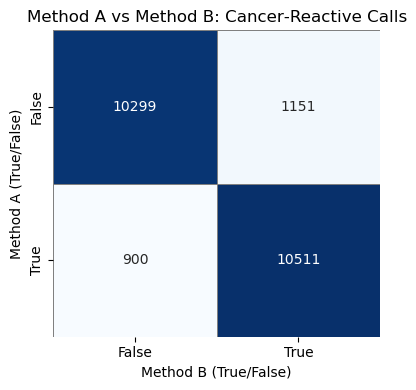

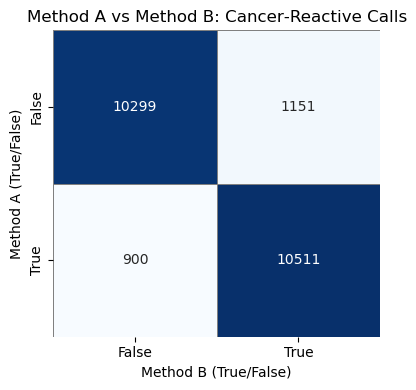

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_table,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
)
plt.title("Method A vs Method B: Cancer‐Reactive Calls")
plt.xlabel("Method B (True/False)")
plt.ylabel("Method A (True/False)")
plt.tight_layout()
plt.show()


In [40]:
# Create a column
merged["agree"] = merged["methodA_reactive"] == merged["methodB_reactive"]

# For each library.id, compute #cells and %agreement
by_lib = (
    merged
    .groupby("library.id")
    .agg(
        total_cells=("agree", "size"),
        n_agree=("agree", "sum")
    )
    .reset_index()
)
by_lib["pct_agree"] = by_lib["n_agree"] / by_lib["total_cells"]

by_lib


,library.id,total_cells,n_agree,pct_agree
0,BC-P20190123-T,203,48,0.236453
1,BC-P20190403-T,384,197,0.513021
2,ESCA-P20181114-T,596,521,0.874161
3,ESCA-P20181123-T,613,498,0.812398
4,ESCA-P20190404-T,354,316,0.892655
5,ESCA-P20190410-T,975,788,0.808205
6,ESCA-P20190411-T,835,769,0.920958
7,ESCA-P20190613-T,720,596,0.827778
8,ESCA-P20190916-T,11,7,0.636364
9,MM-P20181219-T,342,325,0.950292


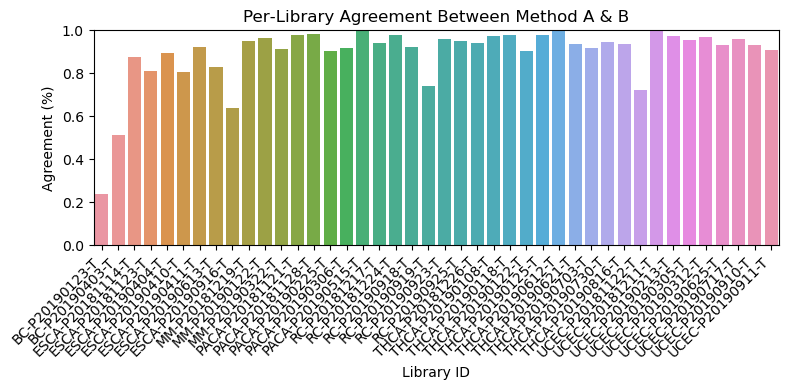

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(data=by_lib, x="library.id", y="pct_agree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agreement (%)")
plt.xlabel("Library ID")
plt.title("Per‐Library Agreement Between Method A & B")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

CD4:

In [43]:

df_A = pd.read_csv("CD4_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD4.csv.gz", index_col=[0, 1])

df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()


df_A["methodA_reactive"] = df_A["CD4_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)

merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one" 
)

print(f"Total cells after merge: {len(merged)}")
merged.head()

print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table

Total cells after merge: 16266
In A but not in B: 661
In B but not in A: 50831


Method B,False,True
Method A,,
False,11168,149
True,1650,3299
